In [75]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [76]:
df = pd.read_json('../../dataset/News_Category_Dataset_v3.json', lines=True)

In [77]:
print(df.shape)

print("Unique categories:",df['category'].nunique())

(209527, 6)
Unique categories: 42


In [78]:
top_10_categories = df['category'].value_counts().nlargest(42).index

In [79]:
top_10_categories

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING',
       'PARENTS', 'THE WORLDPOST', 'WEDDINGS', 'WOMEN', 'CRIME', 'IMPACT',
       'DIVORCE', 'WORLD NEWS', 'MEDIA', 'WEIRD NEWS', 'GREEN', 'WORLDPOST',
       'RELIGION', 'STYLE', 'SCIENCE', 'TECH', 'TASTE', 'MONEY', 'ARTS',
       'ENVIRONMENT', 'FIFTY', 'GOOD NEWS', 'U.S. NEWS', 'ARTS & CULTURE',
       'COLLEGE', 'LATINO VOICES', 'CULTURE & ARTS', 'EDUCATION'],
      dtype='object', name='category')

In [80]:
df = df[df['category'].isin(top_10_categories)]

In [81]:
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [82]:
X = df['headline']  
y = df['category_encoded']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [83]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [88]:
num_classes = len(np.unique(y_train))
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train_tfidf.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  
])


# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy',         
    metrics=['accuracy']                            
)

# Train the model
history = model.fit(X_train_tfidf, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
# Make predictions
y_pred = model.predict(X_test_tfidf)

Epoch 1/5
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.3951 - loss: 2.4214 - val_accuracy: 0.4886 - val_loss: 2.0043
Epoch 2/5
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.5361 - loss: 1.7878 - val_accuracy: 0.4952 - val_loss: 1.9866
Epoch 3/5
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.5879 - loss: 1.5531 - val_accuracy: 0.4955 - val_loss: 2.0622
Epoch 4/5
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.6315 - loss: 1.3628 - val_accuracy: 0.4948 - val_loss: 2.1829
Epoch 5/5
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.6684 - loss: 1.2127 - val_accuracy: 0.4852 - val_loss: 2.3017
Test Loss: 2.29158616065979
Test Accuracy: 0.4891185164451599
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [85]:
history.history

{'accuracy': [0.4121823310852051,
  0.48016345500946045,
  0.5131025314331055,
  0.5369735360145569,
  0.5603895783424377],
 'loss': [2.3698630332946777,
  2.0590877532958984,
  1.9172641038894653,
  1.7966370582580566,
  1.693910002708435],
 'val_accuracy': [0.4573303461074829,
  0.47633108496665955,
  0.4859955310821533,
  0.48805367946624756,
  0.4853094816207886],
 'val_loss': [2.131333112716675,
  2.081941843032837,
  2.0703396797180176,
  2.1076183319091797,
  2.164738178253174]}

In [86]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 256)            │     1,280,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 42)             │         2,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,972,416 (15.15 MB)

 Trainable params: 1,324,138 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,648,278 (10.10 MB)

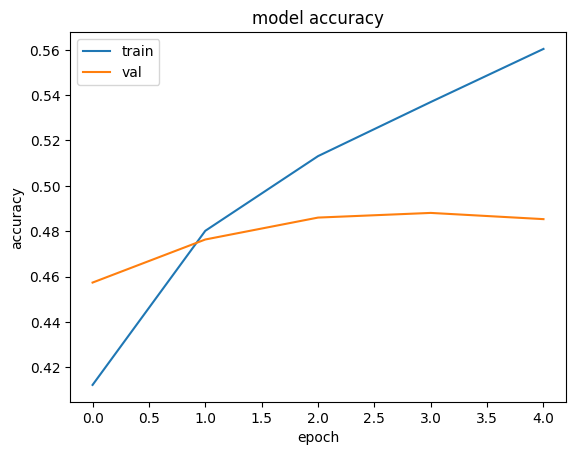

In [87]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()